In [17]:
import geopandas as gpd
mesh = gpd.read_file('../.data/citymesh.geojson')
mesh.head()

OBJECTID  Total_Exis                                           geometry
0         1           1  POLYGON ((-13654625.45737612 5689525.931444315...
1         2           0  POLYGON ((-13654517.08877435 5689528.840540393...
2         3           0  POLYGON ((-13654408.72010272 5689531.74832728,...
3         4           1  POLYGON ((-13654300.35136125 5689534.654804969...
4         5           0  POLYGON ((-13654191.98255 5689537.559973462, -...

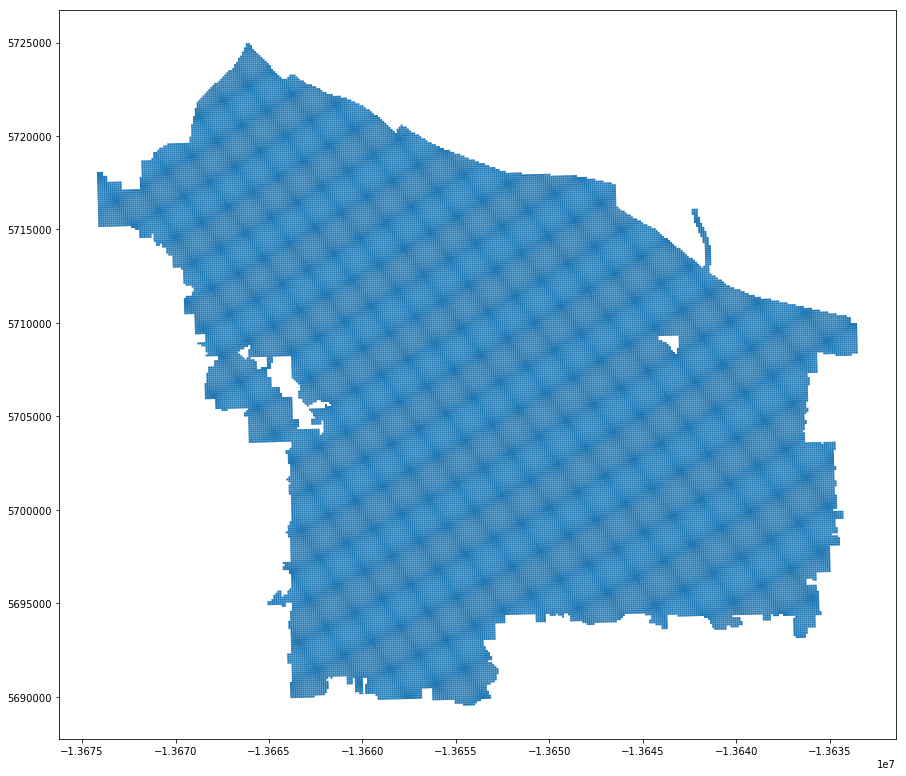

In [18]:
mesh.plot(figsize=(15,15))

## Filtering the mesh by attached number of housing units

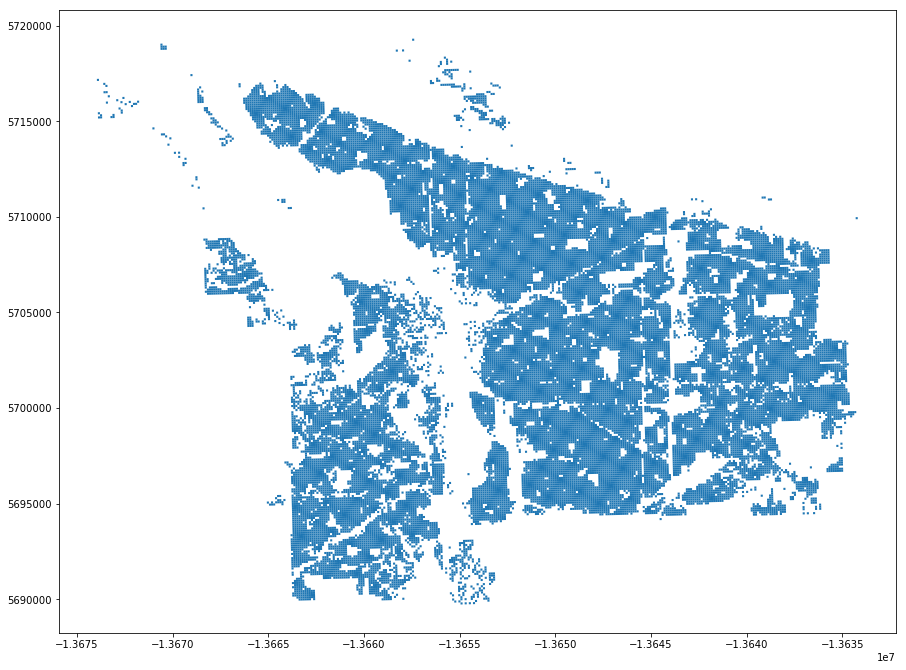

In [19]:
keep = mesh[mesh['Total_Exis'] > 1]
keep.plot(figsize=(15,15))

In [20]:
keep.to_file('../.data/mesh_1.geojson', driver='GeoJSON')

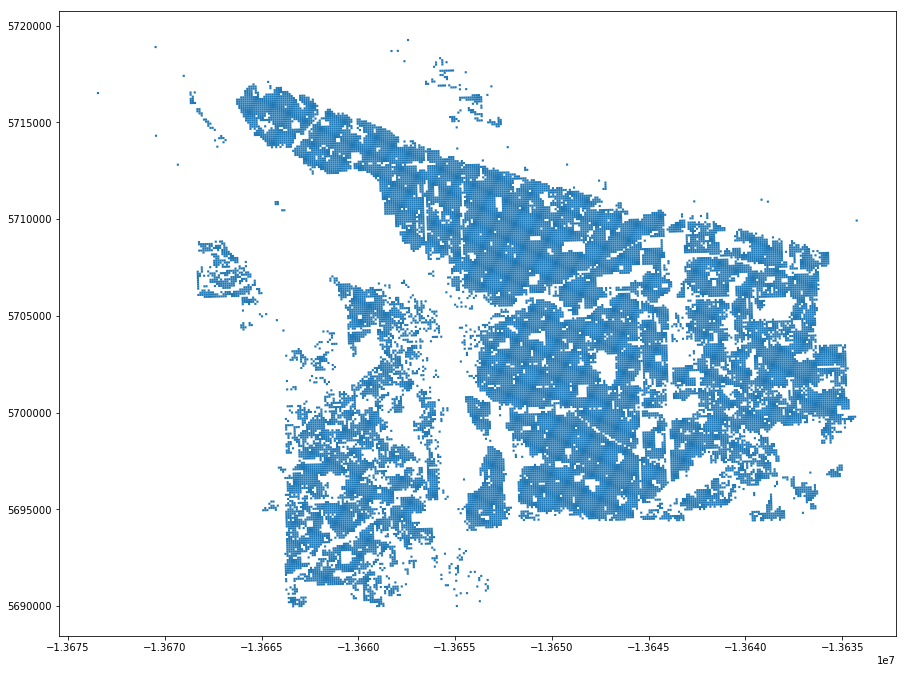

In [21]:
keep = mesh[mesh['Total_Exis'] > 2]
keep.plot(figsize=(15,15))

In [22]:
keep.to_file('../.data/mesh_2.geojson', driver='GeoJSON')

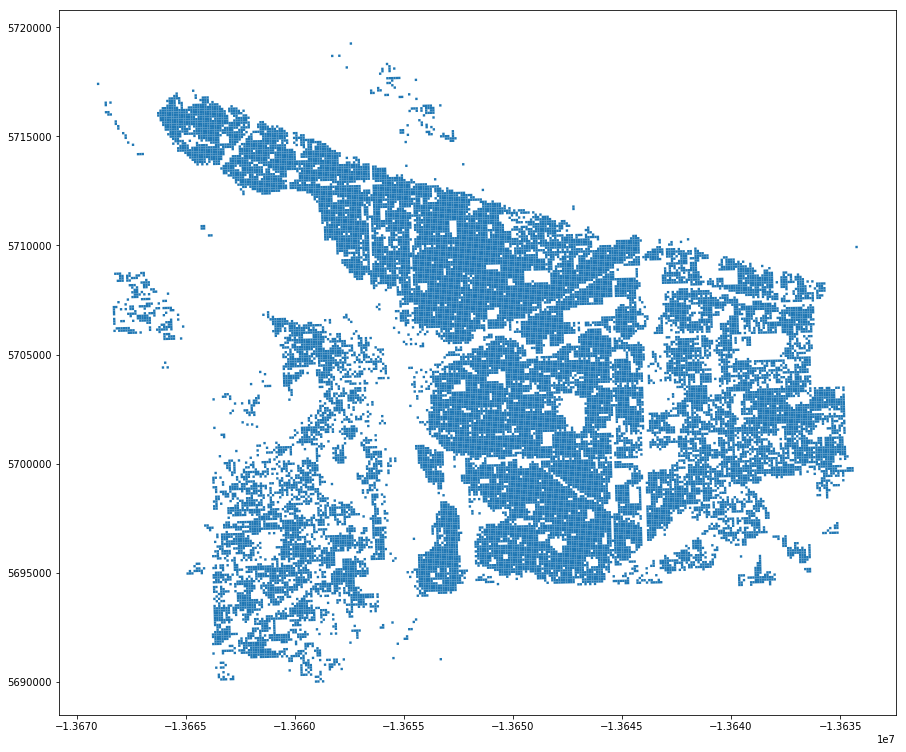

In [23]:
keep = mesh[mesh['Total_Exis'] > 3]
keep.plot(figsize=(15,15))

In [24]:
keep.to_file('../.data/mesh_3.geojson', driver='GeoJSON')

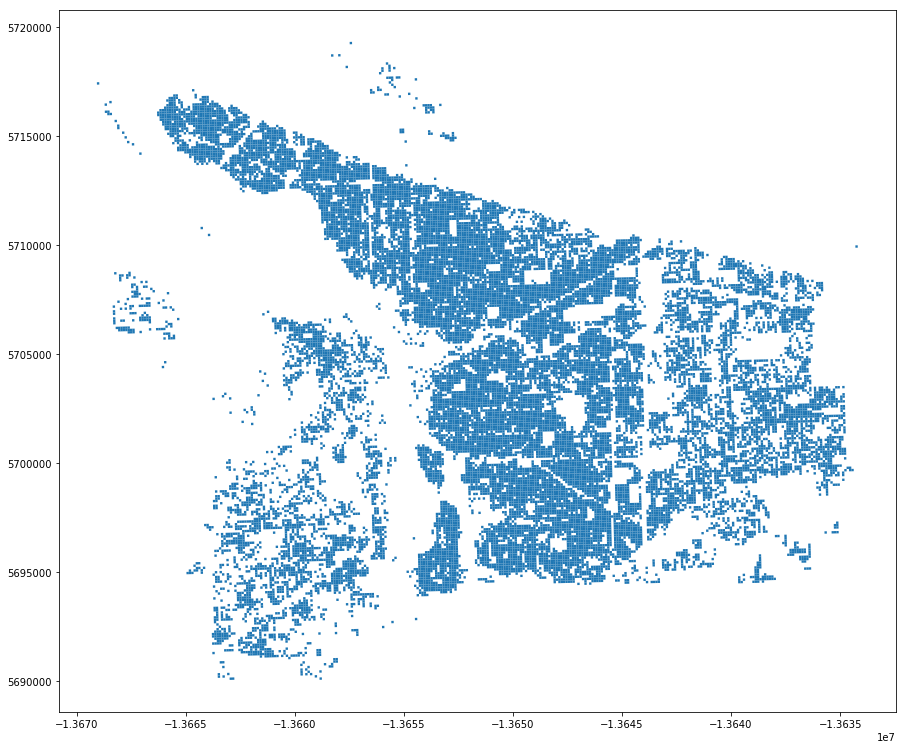

In [25]:
keep = mesh[mesh['Total_Exis'] > 4]
keep.plot(figsize=(15,15))

In [26]:
keep.to_file('../.data/mesh_4.geojson', driver='GeoJSON')

## Filtering the mesh by zoning codes

In [47]:
zoning = gpd.read_file('https://opendata.arcgis.com/datasets/6b26f2ccb71d431f9ce8f34fd8ec1558_16.geojson')
zoning.head()

OBJECTID ZONE  CMP OVRLY CMPOVR PLDIST  HIST CONSV  NRMP UNINC  ...  \
0         1   CL   IS  None   None   None  None  None  None     Y  ...   
1         2   CL   OS  None   None   None  None  None  None     Y  ...   
2         3   CL   OS  None   None   None  None  None  None     Y  ...   
3         4   CL  R10  None   None   None  None  None  None     Y  ...   
4         5   CL  R10  None   None   None  None  None  None     Y  ...   

                   CMP_DESC  OVRLY_DESC PLDIST_DESC HIST_DESC CONSV_DESC  \
0      Industrial Sanctuary        None        None      None       None   
1                Open Space        None        None      None       None   
2                Open Space        None        None      None       None   
3  Single - Dwelling 10,000        None        None      None       None   
4  Single - Dwelling 10,000        None        None      None       None   

  NRMP_DESC MAPLABEL CMPDIFFER CMPOVR_DESC  \
0      None   CL(IS)         Y        None   
1      None   CL(OS)         Y        None   
2      None   CL(OS)         Y        None   
3      None  CL(R10)         Y        None   
4      None  CL(R10)         Y        None   

                                            geometry  
0  POLYGON ((-122.6156378692739 45.46157740359878...  
1  POLYGON ((-122.6529313124114 45.45829959691451...  
2  POLYGON ((-122.6066236481986 45.4612337016146,...  
3  POLYGON ((-122.5634589717726 45.4612088446831,...  
4  POLYGON ((-122.5649339884011 45.46125380906285...  

[5 rows x 23 columns]

In [48]:
groups = zoning.groupby(['CMP', 'CMP_DESC'])

In [49]:
for n,v in groups:
    print(n)

('CX', 'Central Commercial')
('EX', 'Central Employment')
('IC', 'Institutional Campus')
('IS', 'Industrial Sanctuary')
('MDP', 'Manufactured Dwelling Park')
('ME', 'Mixed Employment')
('MU-C', 'Mixed Use - Civic Corridor')
('MU-D', 'Mixed Use - Dispersed')
('MU-N', 'Mixed Use - Neighborhood')
('MU-U', 'Mixed Use - Urban Center')
('OS', 'Open Space')
('R1', 'Multi - Dwelling 1,000')
('R10', 'Single - Dwelling 10,000')
('R2', 'Multi - Dwelling 2,000')
('R2.5', 'Single - Dwelling 2,500')
('R20', 'Single - Dwelling 20,000')
('R3', 'Multi - Dwelling 3,000')
('R5', 'Single - Dwelling 5,000')
('R7', 'Single - Dwelling 7,000')
('RF', 'Single - Dwelling Residential Farm / Forest')
('RH', 'High - Density Multi - Dwelling')
('RX', 'Central Residential')


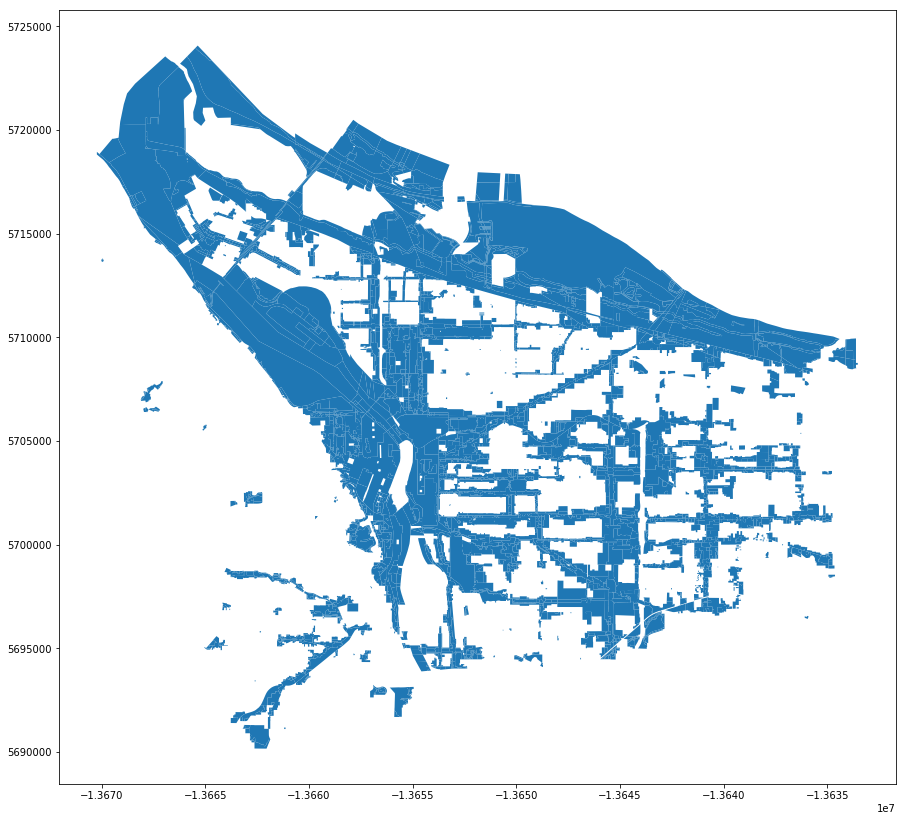

In [50]:
zoning = zoning[~zoning['CMP'].isin(['R5', 'R7', 'R10', 'R20', 'RF', 'OS'])]
zoning = zoning.to_crs(epsg='3857')
zoning.plot(figsize=(15,15))

In [51]:
mesh['centroid'] = mesh['geometry'].centroid

In [54]:
zoned_mesh = gpd.sjoin(mesh, zoning, how='inner', op='within')
zoned_mesh.head()

OBJECTID_left  Total_Exis  \
309            310           0   
310            311           0   
311            312           0   
386            387           0   
470            471           0   

                                              geometry  \
309  POLYGON ((-13662560.13978416 5690179.857648479...   
310  POLYGON ((-13662451.76592857 5690182.862886185...   
311  POLYGON ((-13662343.3920008 5690185.866814629,...   
386  POLYGON ((-13662563.13577009 5690288.591772624...   
470  POLYGON ((-13662349.37882507 5690403.33665215,...   

                                         centroid  index_right  \
309  POINT (-13662507.45052312 5690235.727456721)         6051   
310  POINT (-13662399.07597897 5690238.732075882)         6051   
311  POINT (-13662290.70136267 5690241.735385767)         6051   
386  POINT (-13662510.44589268 5690344.462267233)         6051   
470  POINT (-13662296.68695411 5690459.206595985)         6052   

     OBJECTID_right ZONE CMP OVRLY CMPOVR  ...               ZONE_DESC  \
309            6052  CI2  IC     c   None  ...  Campus Institutional 2   
310            6052  CI2  IC     c   None  ...  Campus Institutional 2   
311            6052  CI2  IC     c   None  ...  Campus Institutional 2   
386            6052  CI2  IC     c   None  ...  Campus Institutional 2   
470            6053  CI2  IC  None   None  ...  Campus Institutional 2   

                 CMP_DESC                  OVRLY_DESC PLDIST_DESC HIST_DESC  \
309  Institutional Campus  Environmental Conservation        None      None   
310  Institutional Campus  Environmental Conservation        None      None   
311  Institutional Campus  Environmental Conservation        None      None   
386  Institutional Campus  Environmental Conservation        None      None   
470  Institutional Campus                        None        None      None   

     CONSV_DESC  NRMP_DESC MAPLABEL CMPDIFFER CMPOVR_DESC  
309        None       None     CI2c         N        None  
310        None       None     CI2c         N        None  
311        None       None     CI2c         N        None  
386        None       None     CI2c         N        None  
470        None       None      CI2         N        None  

[5 rows x 27 columns]

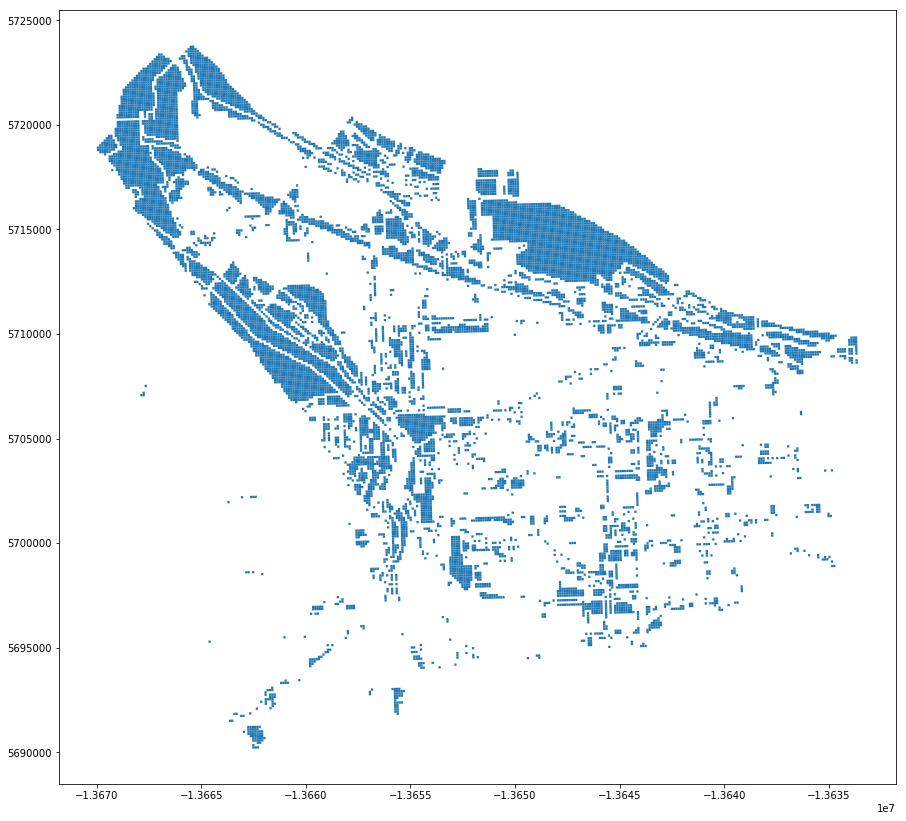

In [55]:
zoned_mesh.plot(figsize=(15,15))

In [57]:
import pandas as pd
frames = [keep, zoned_mesh]
result = pd.concat(frames)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


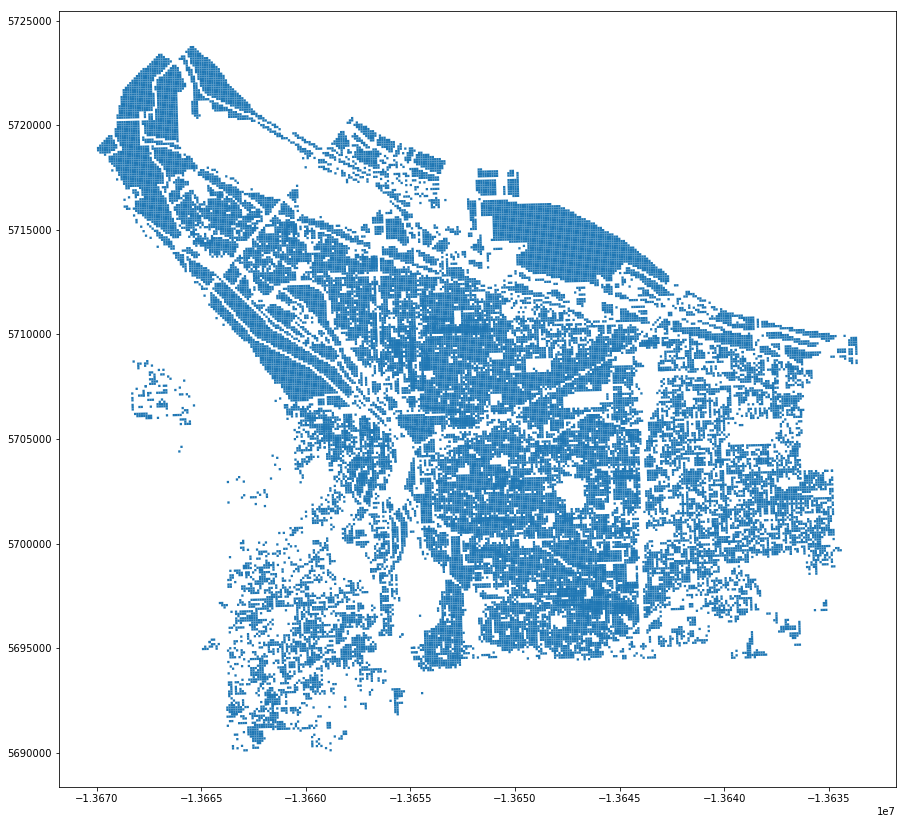

In [58]:
result.plot(figsize=(15,15))

In [59]:
result.columns.to_list()

['CMP',
 'CMPDIFFER',
 'CMPOVR',
 'CMPOVR_DESC',
 'CMP_DESC',
 'CONSV',
 'CONSV_DESC',
 'HIST',
 'HIST_DESC',
 'MAPLABEL',
 'NRMP',
 'NRMP_DESC',
 'OBJECTID',
 'OBJECTID_left',
 'OBJECTID_right',
 'OVRLY',
 'OVRLY_DESC',
 'PLDIST',
 'PLDIST_DESC',
 'Shape_Area',
 'Shape_Length',
 'Total_Exis',
 'UNINC',
 'ZONE',
 'ZONE_DESC',
 'centroid',
 'centroids',
 'geometry',
 'index_right']

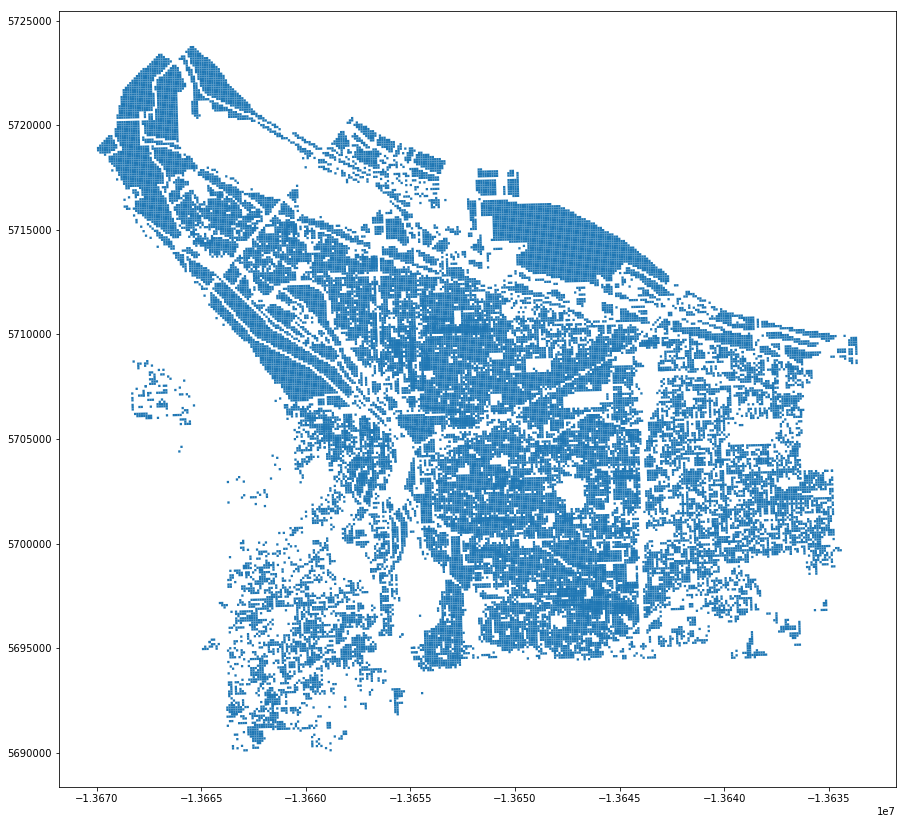

In [60]:
result = result[['geometry']]
result = result.to_crs(epsg=4326)
result.plot(figsize=(15,15))

In [61]:
result.crs

{'init': 'epsg:4326', 'no_defs': True}

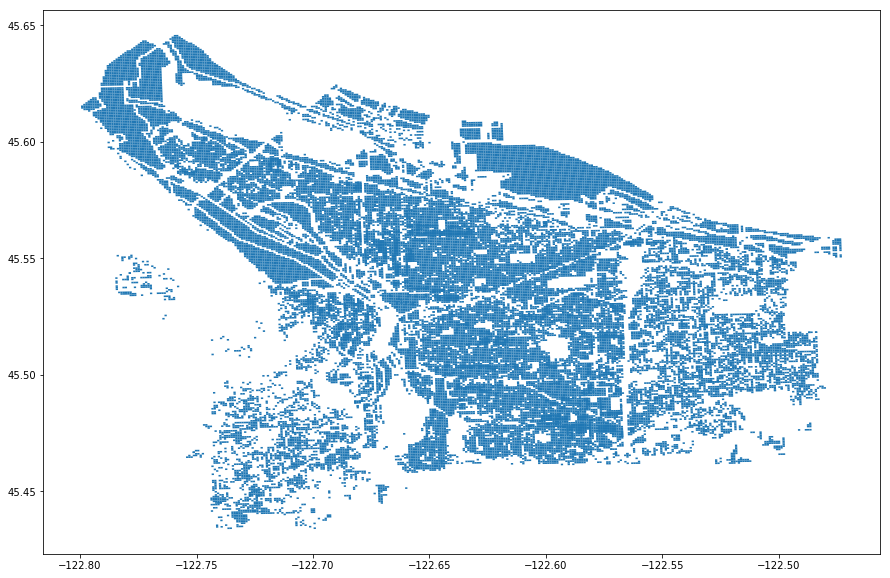

In [62]:
result.crs = {'init': 'epsg:3857', 'no_defs': True}
result = result.to_crs(epsg=4326)
result.plot(figsize=(15,15))

In [63]:
result.to_file('../.data/mesh.geojson', driver='GeoJSON')